# ML project ⚙️

### ✨ Part1: supervised learning 

In [5]:
# import necessary libraries
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits  # this loads the digits dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
warnings.filterwarnings("ignore")

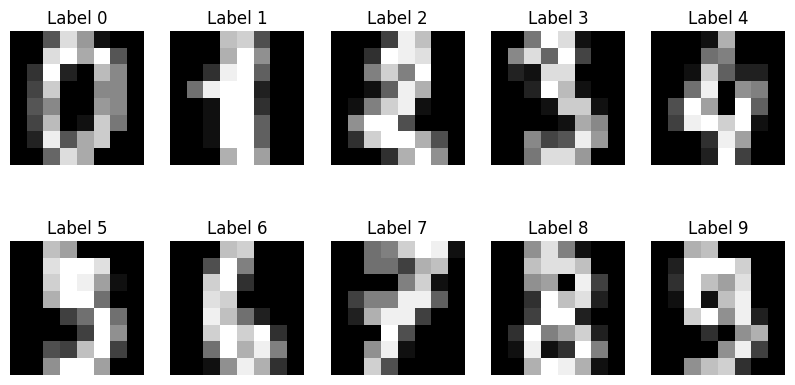


The model rankings:
1. Support Vector Machine (SVM): 0.9750
2. K-Nearest Neighbors (KNN): 0.9667
3. Random Forest: 0.9639

The best performing model is: Support Vector Machine (SVM) with an accuracy of 0.9750


In [ ]:
# step1: load digits dataset
digits_dataset = load_digits()

# create figure with a 2 row by 5 column grid of subplots to display sample images
figure, axis_grid = plt.subplots(2, 5, figsize=(10, 5))

# display 10 images with their corresponding labels
for axis, digit_image, digit_label in zip(
    axis_grid.ravel(), digits_dataset.images, digits_dataset.target
):
    axis.imshow(digit_image, cmap="gray")  # display image in grayscale
    axis.set_title(f"Label {digit_label}")  # set title with the digit label
    axis.axis("off")  # hide axis ticks and labels
plt.show()

# step2: flatten the images by convert 8x8 images into 64 pixel feature vectors
image_features = digits_dataset.data  # image pixel values
image_labels = digits_dataset.target  # corresponding digit labels from 0-9

# step3: split dataset into training 80% and testing 20% sets
X_train, X_test, y_train, y_test = train_test_split(
    image_features, image_labels, test_size=0.2, random_state=42, stratify=image_labels
)

# step4: standardize the feature values to improves model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# step5: train multiple classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine (SVM)": SVC(kernel="linear", C=1.0, random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=3),
}

# dictionary to store accuracy scores of different models
model_accuracies = {}

for model_name, classifier in classifiers.items():
    classifier.fit(X_train_scaled, y_train)  # train the classifier on training data
    predictions = classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    model_accuracies[model_name] = accuracy

# step6: sort models by accuracy and select best performing model
sorted_models = sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True)

# print the model rankings
print("\nThe model rankings:")
for rank, (model_name, accuracy) in enumerate(sorted_models, start=1):
    print(f"{rank}. {model_name}: {accuracy:.4f}")

# display the best model separately
best_model_name, best_model_accuracy = sorted_models[0]
print(f"\nThe best performing model is: {best_model_name} with an accuracy of {best_model_accuracy:.4f}")

### ✨ Part2: unsupervised learning 

In [24]:
# import necessary libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA

In [ ]:
# step1: load the dataset
movie_reviews_df = pd.read_csv("MovieReviewsData.csv")

print("Simple data:\n", movie_reviews_df.head())

# step2: preprocess text data so clean and normalize text
lemmatizer = WordNetLemmatizer()

def clean_review_text(review_text):
    review_text = re.sub(r"<.*?>", "", review_text)  # remove HTML tags
    review_text = re.sub(r"\s+", " ", review_text).strip()  # remove extra spaces
    review_text = re.sub(r"[^\w\s']+", "", review_text)  # keep apostrophes
    review_text = re.sub(r"\d+", "", review_text)  # remove numbers
    review_text = review_text.lower()  # convert to lowercase
    return review_text

# apply cleaning function to the review column
movie_reviews_df["cleaned_review"] = movie_reviews_df["review"].apply(clean_review_text)

print("\nSimple cleaned data:\n", movie_reviews_df[["cleaned_review"]].head())

Simple data:
                                               review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Simple cleaned data:
                                       cleaned_review
0  one of the other reviewers has mentioned that ...
1  a wonderful little production the filming tech...
2  i thought this was a wonderful way to spend ti...
3  basically there's a family where a little boy ...
4  petter mattei's love in the time of money is a...


In [ ]:
# step3: convert text into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# convert cleaned reviews into TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(movie_reviews_df["cleaned_review"])

print(f"Shape of TF-IDF matrix: {tfidf_matrix.shape}")

# step4: apply dimensionality reduction using truncated SVD
svd = TruncatedSVD(n_components=100, random_state=42)

# apply the reduction to the TF-IDF matrix
tfidf_reduced_matrix = svd.fit_transform(tfidf_matrix)

print("\nShape of reduced TF-IDF matrix:", tfidf_reduced_matrix.shape)

Shape of TF-IDF matrix: (50000, 1000)

Shape of reduced TF-IDF matrix: (50000, 100)


In [ ]:
# step5: apply clustering algorithms the K-Means and DBSCAN and evaluate using silhouette score
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans_model.fit_predict(tfidf_reduced_matrix)

# evaluate K-Means using silhouette score
kmeans_silhouette_score = silhouette_score(tfidf_reduced_matrix, kmeans_labels)
print(f"Silhouette score for K-Means: {kmeans_silhouette_score:.4f}")

dbscan_model = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan_model.fit_predict(tfidf_reduced_matrix)

# evaluate DBSCAN using silhouette score
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette_score = silhouette_score(tfidf_reduced_matrix, dbscan_labels)
    print(f"\nSilhouette score for DBSCAN: {dbscan_silhouette_score:.4f}")
else:
    print("\nDBSCAN did not find enough clusters for evaluation")

Silhouette score for K-Means: 0.0382

Silhouette score for DBSCAN: 0.0893


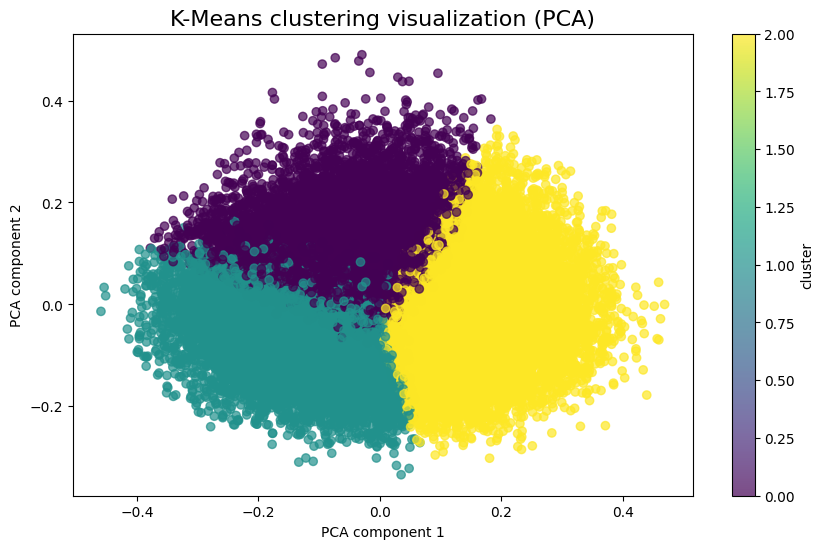

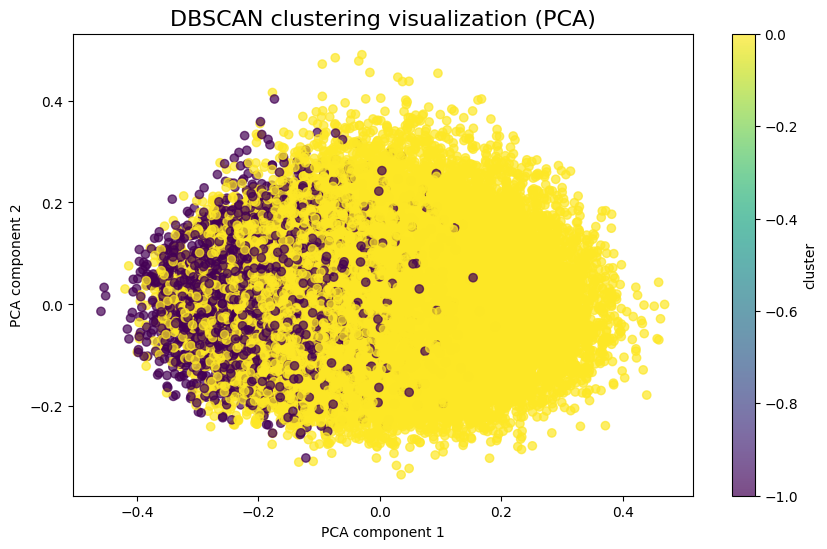

In [31]:
# step6: visualize clusters using PCA
pca = PCA(n_components=2)  # reduce to 2 components for 2D visualization
pca_components = pca.fit_transform(tfidf_reduced_matrix)

# plot clusters from K-Means
plt.figure(figsize=(10, 6))
plt.scatter(
    pca_components[:, 0],
    pca_components[:, 1],
    c=kmeans_labels,
    cmap="viridis",
    marker="o",
    alpha=0.7,
)
plt.title("K-Means clustering visualization (PCA)", fontsize=16)
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.colorbar(label="cluster")
plt.show()

# plot clusters from DBSCAN and might have noise which is labeled as -1
plt.figure(figsize=(10, 6))
plt.scatter(
    pca_components[:, 0],
    pca_components[:, 1],
    c=dbscan_labels,
    cmap="viridis",
    marker="o",
    alpha=0.7,
)
plt.title("DBSCAN clustering visualization (PCA)", fontsize=16)
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.colorbar(label="cluster")
plt.show()

### ✨ Part3: association rule learning - discovering patterns

In [2]:
# import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import networkx as nx
import matplotlib.pyplot as plt

Sample data:
   member_number        date  item_description
0           1808  21/07/2015    tropical fruit
1           2552  05/01/2015        whole milk
2           2300  19/09/2015         pip fruit
3           1187  12/12/2015  other vegetables
4           3037  01/02/2015        whole milk

Sample transactions:
[['soda', 'canned beer', 'sausage', 'sausage', 'whole milk', 'whole milk', 'pickled vegetables', 'misc. beverages', 'semi-finished bread', 'hygiene articles', 'yogurt', 'pastry', 'salty snack'], ['frankfurter', 'frankfurter', 'beef', 'sausage', 'whole milk', 'soda', 'curd', 'white bread', 'whole milk', 'soda', 'whipped/sour cream', 'rolls/buns'], ['tropical fruit', 'butter milk', 'butter', 'frozen vegetables', 'sugar', 'specialty chocolate', 'whole milk', 'other vegetables'], ['sausage', 'root vegetables', 'rolls/buns', 'detergent', 'frozen meals', 'rolls/buns', 'dental care', 'rolls/buns'], ['other vegetables', 'pip fruit', 'root vegetables', 'canned beer', 'rolls/buns', 'w

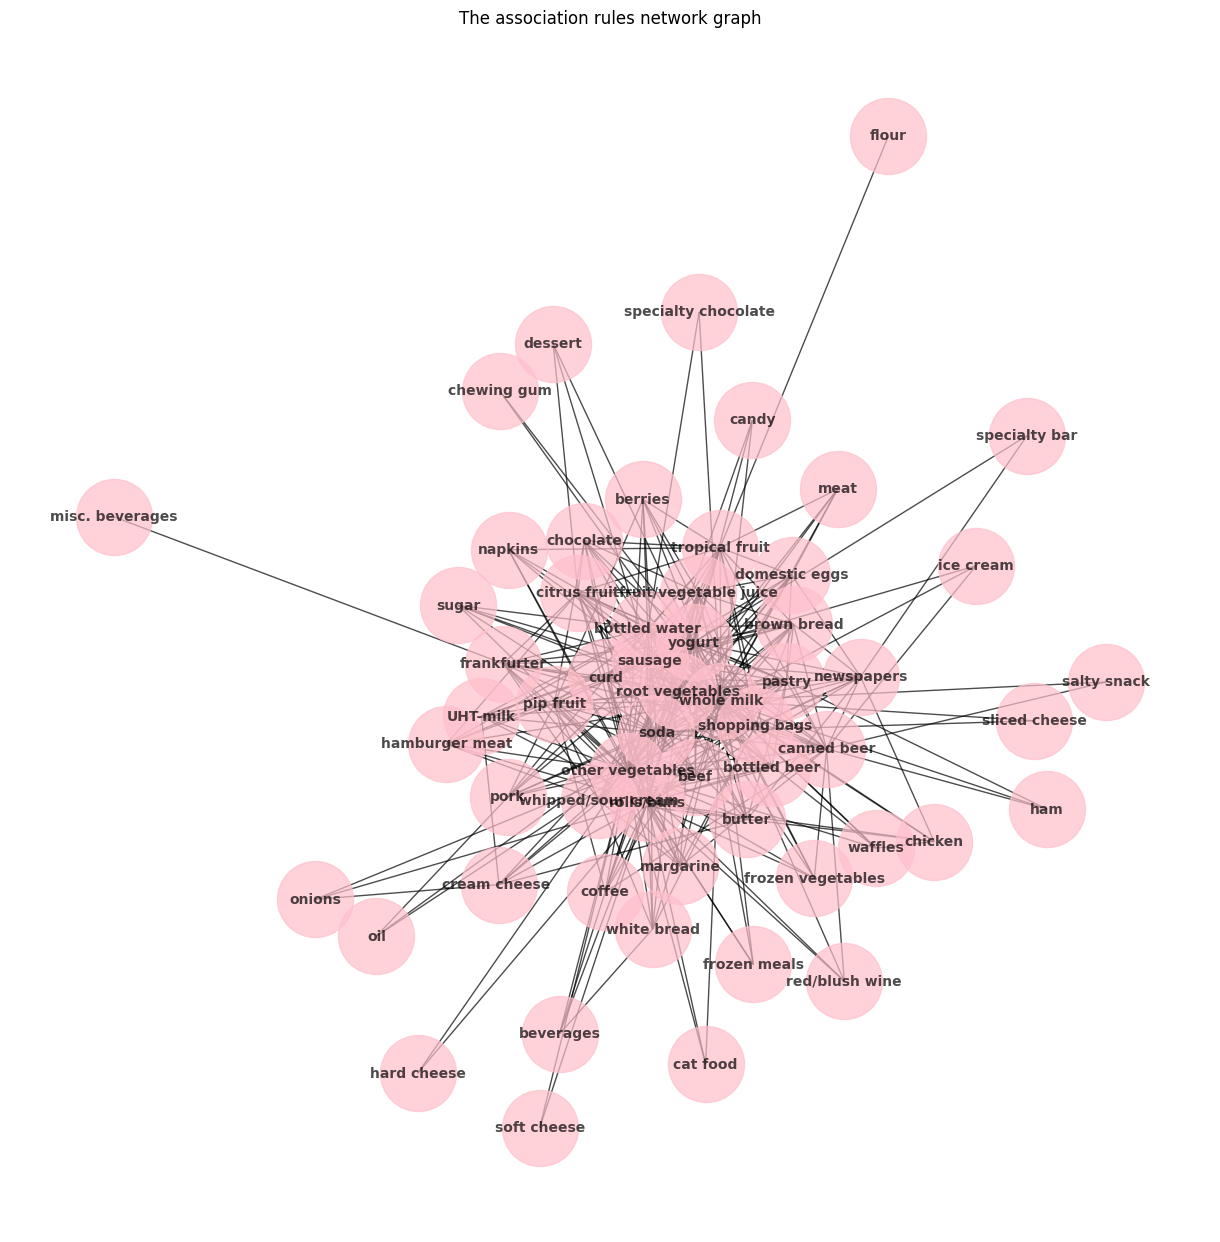

In [7]:
# step1: load dataset
grocery_data = pd.read_csv("GroceriesData.csv")

# display first few rows of dataset
print("Sample data:")
print(grocery_data.head())

# step2: preprocess the data to create a transaction list
transaction_list = (
    grocery_data.groupby("member_number")["item_description"].apply(list).tolist()
)  # group data by member_number and convert each transaction to a list of items

# display a few sample transactions
print("\nSample transactions:")
print(transaction_list[:5])

# step3: apply the apriori algorithm
encoder = TransactionEncoder()
encoded_transactions = encoder.fit(transaction_list).transform(transaction_list)

# create a DataFrame from the one-hot encoded transactions
transaction_df = pd.DataFrame(encoded_transactions, columns=encoder.columns_)

# apply the apriori algorithm to find frequent item sets with a minimum support of 1%
frequent_itemsets = apriori(transaction_df, min_support=0.01, use_colnames=True)

# display frequent itemsets
print("\nFrequent itemsets found by apriori algorithm:")
print(frequent_itemsets)

# step4: generate association rules
association_rules_df = association_rules(
    frequent_itemsets, metric="lift", min_threshold=1.5
)

# display association rules
print("\nAssociation rules (antecedents, consequents, support, confidence, lift):")
print(
    association_rules_df[
        ["antecedents", "consequents", "support", "confidence", "lift"]
    ]
)

# step5: visualize association rules using a network graph
association_graph = nx.Graph()

# add edges to graph based on the association rules
for index, row in association_rules_df.iterrows():
    for antecedent in row["antecedents"]:
        for consequent in row["consequents"]:
            association_graph.add_edge(antecedent, consequent, weight=row["lift"])

# visualize network graph
print("\n")
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(association_graph, k=0.15)
nx.draw(
    association_graph,
    pos,
    with_labels=True,
    node_size=3000,
    node_color="pink",
    font_size=10,
    font_weight="bold",
    alpha=0.7,
)
plt.title("The association rules network graph")
plt.show()